In [458]:
import pandas as pd
import numpy as np

# Tratamiento de las hojas

## Ordenes

In [ ]:
#Hoja de Ordenes
df_orders = pd.read_excel(r"",sheet_name="orders")

Estructura de las ordenes
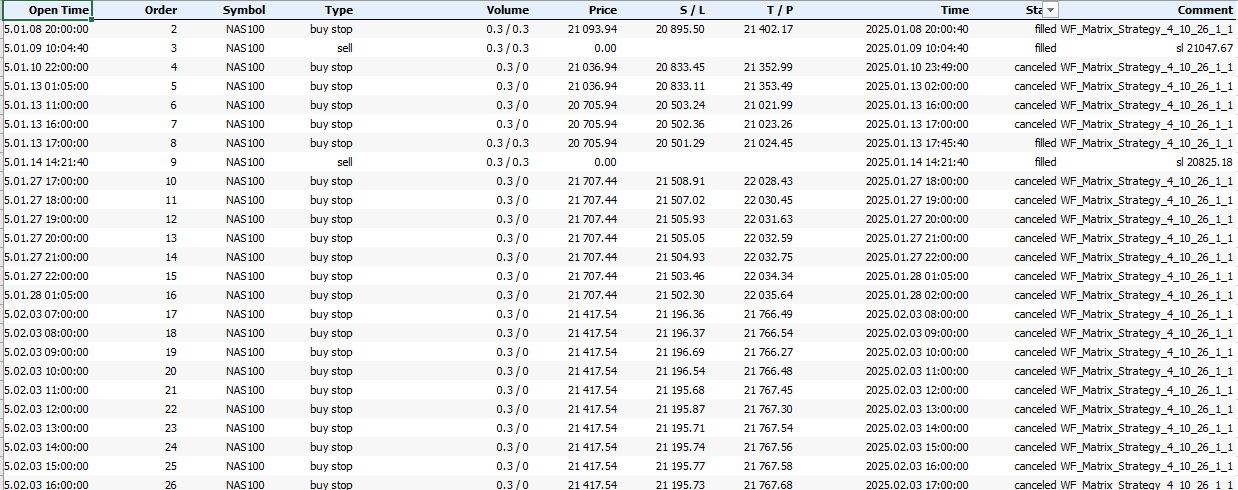

In [460]:
#Borrar las ordenes canceladas
df_orders = df_orders[df_orders['State'] != 'canceled']

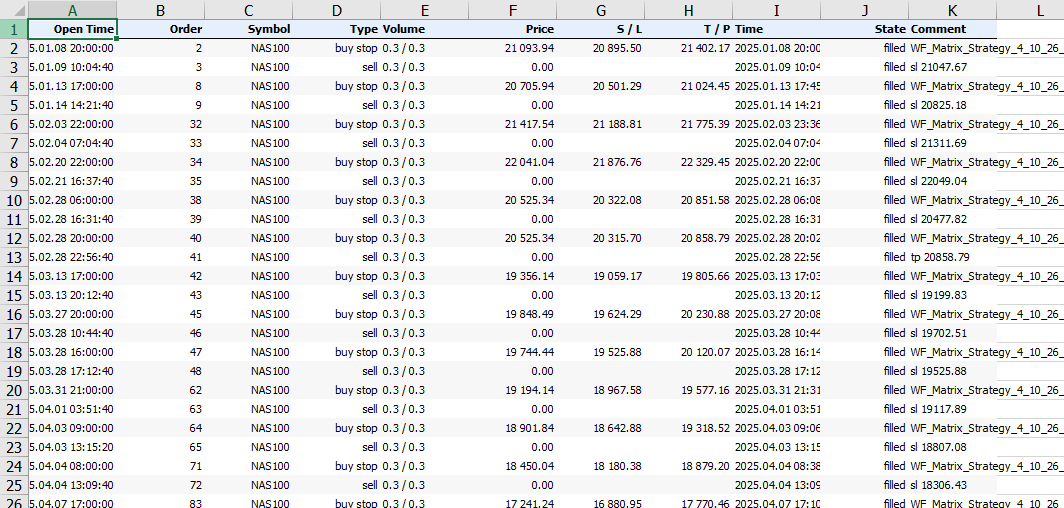

In [461]:
#Seleccion de las columnas que NO SON unnamed creadas por error por celdas combinandas en excel (como Volume, Time)
df_orders = df_orders.loc[:, ~df_orders.columns.str.contains('^Unnamed')]


In [462]:
#Eliminar filas con valores NaN (Las ordenes sell en este caso)
df_orders.dropna(inplace=True)

#Reasignando indices
df_orders.reset_index(drop=True, inplace=True)

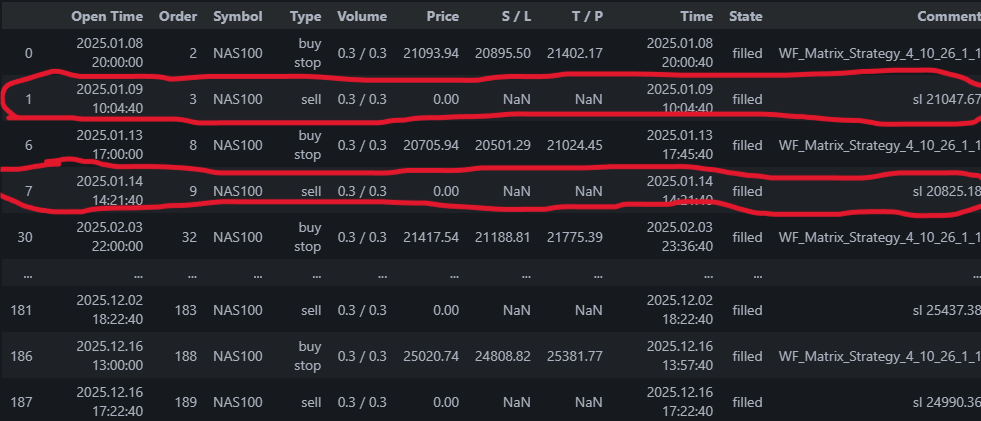

## Deals

In [ ]:
#Hoja de Deals
df_deals = pd.read_excel(r"",sheet_name="deals")

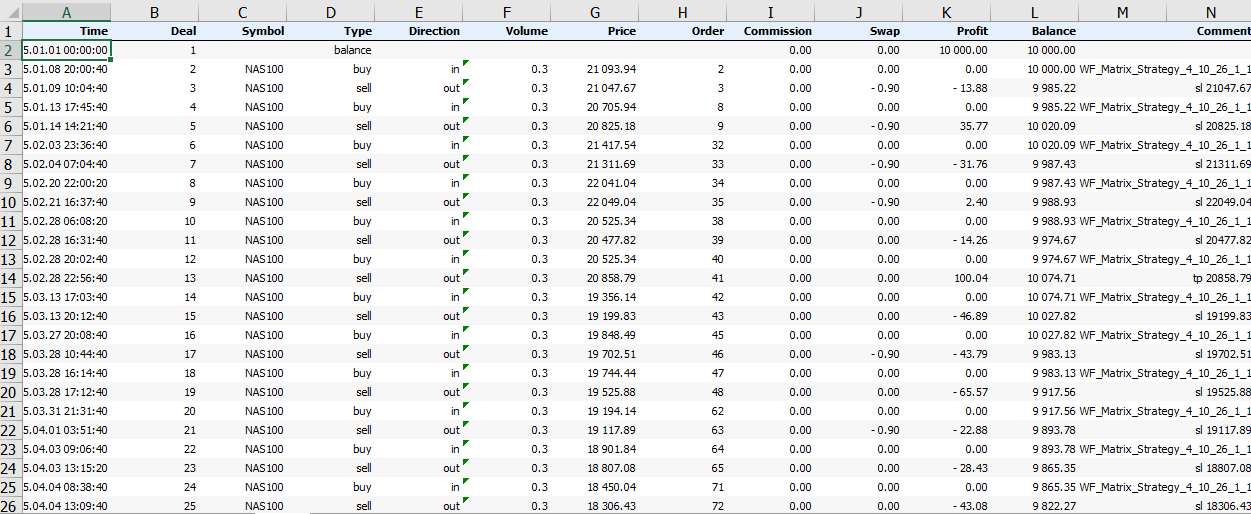

In [464]:
#* Borrar primer fila con el balance 
# .iloc[0,1] es para verificar si en la primera fila en la segunda columna (Deal) el valor es 1 que corresponde al deal del balance inicial
if df_deals.iloc[0,1] ==1:
    
    # .drop[0] para borrar la primera fila
    df_deals.drop([0],inplace=True)

In [465]:
#! Crear dataframe solo con los out de las columnas de interes(Time(Exit), Price(Exit), Commission, Swap, Profit)

df_deals_out = df_deals[df_deals["Direction"]=="out"][["Time","Price","Commission","Swap","Profit"]]
#Reset index para poder hacer el concat depués
df_deals_out.reset_index(drop=True,inplace=True)



DataFrame de Deals_out
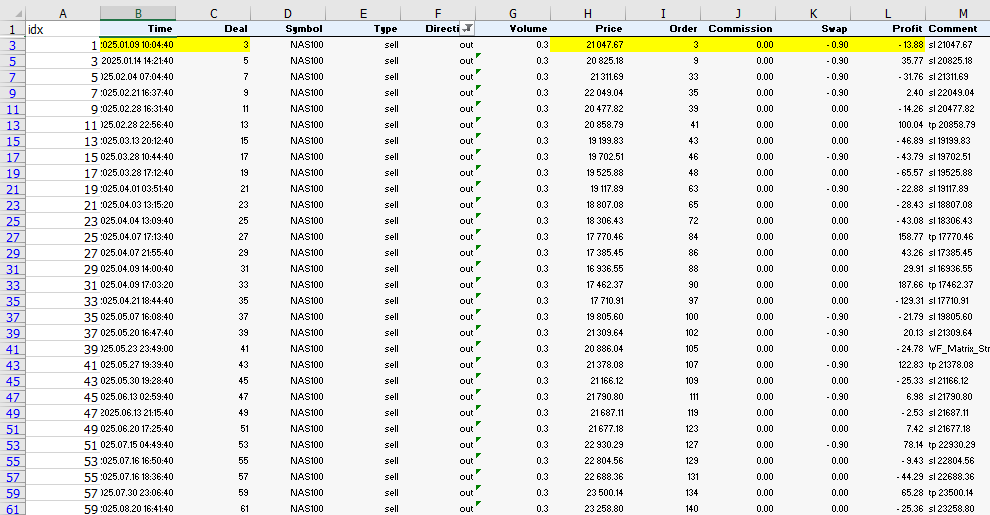

In [466]:
#! Crear dataframe solo con los in

df_deals_in =df_deals[df_deals["Direction"]=="in"]

#Reset index para poder hacer el concat depués
df_deals_in.reset_index(drop=True,inplace=True)

Deals IN
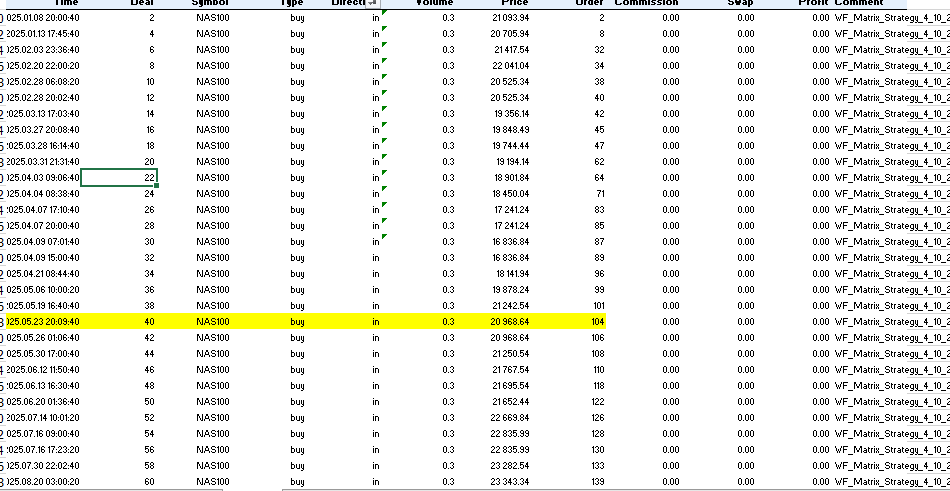

# Unir los dataframes en el tipo correspondiente

In [467]:
columns_to_add_from_deals_in = ["Time","Deal","Symbol","Type","Volume","Price"]
columns_to_add_from_deals_out = ["Time","Price","Commission","Swap","Profit"]
columns_to_add_from_orders = ["Price","S / L","T / P","Time"]

final_df = pd.concat(
                    [
                    df_deals_in[columns_to_add_from_deals_in],
                    df_orders[columns_to_add_from_orders],                      
                    df_deals_out[columns_to_add_from_deals_out]
                    ],axis=1)


final_df.columns.values[0] = "Time Open"
final_df.columns.values[5] = "Price Open"
final_df.columns.values[8] = "Time Close"
final_df.columns.values[9] = "Price Close"


Resultado Final
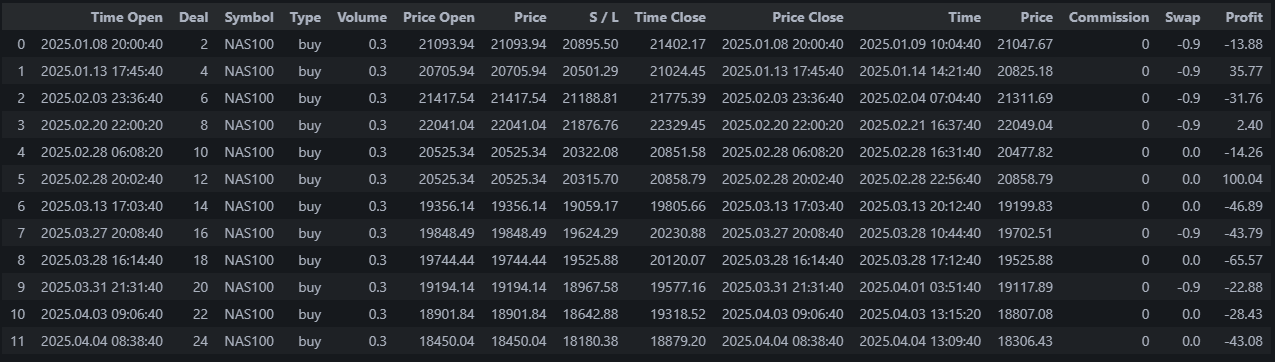

# Exportando el archivo

In [468]:
# final_df.to_csv(f"Files/backtest_formateado.csv",index=False)